In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
training_data=pd.read_excel(r"C:\Users\priya\OneDrive\Desktop\Training Data.xlsx",nrows=1000)
training_data = training_data.reindex(np.random.permutation(training_data.index)) # shuffle the training set

In [3]:
test_data=pd.read_excel(r"C:\Users\priya\OneDrive\Desktop\Test Data.xlsx",nrows=1000)
training_data.corr()

##trying to find relations between features and target variable.

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
Id,1.000000,-0.086264,0.006534,0.046729,-0.031259,-0.033380,-0.087829
income,-0.086264,1.000000,0.002609,-0.003239,0.030299,0.010324,0.048384
age,0.006534,0.002609,1.000000,-0.020710,0.024418,-0.142717,-0.006982
experience,0.046729,-0.003239,-0.020710,1.000000,0.636892,0.064015,0.033410
current_job_years,-0.031259,0.030299,0.024418,0.636892,1.000000,0.025435,0.060881
current_house_years,-0.033380,0.010324,-0.142717,0.064015,0.025435,1.000000,-0.072396
risk_flag,-0.087829,0.048384,-0.006982,0.033410,0.060881,-0.072396,1.000000


In [4]:
test_data.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [5]:
training_data = training_data.reindex(np.random.permutation(training_data.index))
train_df_mean = training_data.loc[:,training_data.columns!="risk_flag"].mean()
train_df_std = training_data.loc[:,training_data.columns!="risk_flag"].std()
train_df_mean["risk_flag"]=0
train_df_std["risk_flag"]=1
train_df_norm = (training_data - train_df_mean)/train_df_std
##scaling all the features to similar values
test_df_mean = test_data.mean()
test_df_std  = test_data.std()
test_df_norm = (test_data - test_df_mean)/test_df_std
##Scaling test data too
feature_columns=[]
##A empty list to contain all feature columns
test_df_norm.head()

,age,car_ownership,city,current_house_years,current_job_years,experience,house_ownership,id,income,married,profession,state
0,0.552454,NaN,NaN,0.708037,-0.619211,1.471949,NaN,-1.729454,0.789818,NaN,NaN,NaN
1,-1.439215,NaN,NaN,-1.431048,-0.348695,-0.835698,NaN,-1.725992,-1.356302,NaN,NaN,NaN
2,0.025247,NaN,NaN,1.421066,0.733369,0.318126,NaN,-1.722530,1.313748,NaN,NaN,NaN
3,-0.033331,NaN,NaN,-0.004991,-0.889727,-0.176370,NaN,-1.719067,-1.102920,NaN,NaN,NaN
4,-1.439215,NaN,NaN,-0.718020,1.815433,1.307117,NaN,-1.715605,-1.773701,NaN,NaN,NaN


In [6]:
del train_df_norm["car_ownership"]
del train_df_norm["city"]
del train_df_norm["house_ownership"]
del train_df_norm["married"]
del train_df_norm["profession"]
del train_df_norm["state"]

del test_df_norm["car_ownership"]
del test_df_norm["city"]
del test_df_norm["house_ownership"]
del test_df_norm["married"]
del test_df_norm["profession"]
del test_df_norm["state"]

train_df_norm.head(10)
test_df_norm.head(10)


,age,current_house_years,current_job_years,experience,id,income
0,0.552454,0.708037,-0.619211,1.471949,-1.729454,0.789818
1,-1.439215,-1.431048,-0.348695,-0.835698,-1.725992,-1.356302
2,0.025247,1.421066,0.733369,0.318126,-1.722530,1.313748
3,-0.033331,-0.004991,-0.889727,-0.176370,-1.719067,-1.102920
4,-1.439215,-0.718020,1.815433,1.307117,-1.715605,-1.773701
5,1.665446,-1.431048,-0.889727,0.647789,-1.712142,-0.584218
6,0.318140,1.421066,-1.701275,-1.659857,-1.708680,-0.006227
7,1.196818,0.708037,2.085949,0.812621,-1.705218,0.554941
8,-0.384802,0.708037,-0.078179,-0.506034,-1.701755,1.129104
9,0.903925,-0.004991,-0.889727,-0.835698,-1.698293,1.544446


In [7]:
training_data.head(10)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
495,496,8644938,26,11,married,rented,no,Architect,South_Dumdum,West_Bengal,9,10,0
81,82,6115704,57,17,single,owned,no,Economist,Deoghar,Jharkhand,12,14,1
696,697,2707807,35,12,single,rented,no,Civil_engineer,Ambarnath,Maharashtra,4,13,0
501,502,3516704,54,17,single,rented,no,Air_traffic_controller,Vellore,Tamil_Nadu,13,10,0
356,357,8776228,37,15,single,rented,yes,Magistrate,Burhanpur,Madhya_Pradesh,14,11,1
291,292,7110369,35,7,single,rented,yes,Computer_hardware_engineer,Mangalore,Karnataka,3,11,0
35,36,7537675,45,4,single,rented,no,Graphic_Designer,Gopalpur,West_Bengal,4,14,0
583,584,6201762,46,1,single,rented,no,Lawyer,Kochi,Kerala,1,10,1
737,738,1117930,79,15,single,rented,no,Drafter,Rohtak,Haryana,9,12,1
977,978,9789626,21,20,single,rented,no,Economist,Jehanabad[38],Bihar,4,13,1


In [8]:
age = tf.feature_column.numeric_column("age")
feature_columns.append(age)
exp = tf.feature_column.numeric_column("experience")
feature_columns.append(exp)
feature_layer = layers.DenseFeatures(feature_columns)
feature_layer(dict(train_df_norm))

<tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[-1.4395387 ,  0.1695492 ],
       [ 0.38102672,  1.1678762 ],
       [-0.91098744,  0.33593702],
       ...,
       [ 1.0857617 ,  0.33593702],
       [-1.0871712 ,  1.0014883 ],
       [ 1.555585  , -0.16322646]], dtype=float32)>

In [9]:
def create_model(my_learning_rate, feature_layer, my_metrics):
  model = tf.keras.models.Sequential()

  model.add(feature_layer)

  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)
   
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model 

In [10]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  epochs = history.epoch

  hist = pd.DataFrame(history.history)

  return epochs, hist  

In [11]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

In [12]:
train_df_norm.describe()

,Id,age,current_house_years,current_job_years,experience,income,risk_flag
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,1.776357e-18,-1.421085e-17,3.730349e-17,3.730349e-17,5.329071e-18,7.815970e-17,0.169000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.374939
min,-1.729454e+00,-1.733178e+00,-1.421758e+00,-1.693338e+00,-1.660717e+00,-1.729089e+00,0.000000
25%,-8.647271e-01,-8.669415e-01,-7.319190e-01,-8.880093e-01,-8.287778e-01,-8.758693e-01,0.000000
50%,0.000000e+00,-3.006869e-02,-4.208017e-02,-8.268043e-02,3.161369e-03,-1.225260e-02,0.000000
75%,8.647271e-01,9.095780e-01,6.477587e-01,7.226484e-01,8.351005e-01,8.581847e-01,0.000000
max,1.729454e+00,1.673041e+00,1.337598e+00,2.064863e+00,1.667040e+00,1.719003e+00,1.000000


Epoch 1/1500
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/1 [==============================] - 0s 321ms/step - loss: 0.8933 - accuracy: 0.3920
Epoch 2/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.8912 - accuracy: 0.3930
Epoch 3/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.8898 - accuracy: 0.3930
Epoch 4/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.8886 - accuracy: 0.3930
Epoch 5/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.8875 - accuracy: 0.3930
Epoch 6/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.8865 - accuracy: 0.3930
Epoch 7/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.8855 - accuracy: 0.3930
Epoch 8/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.8847 - accuracy: 0.3930
Epoch 9/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.8838 - accuracy: 0.3930
Epoch 

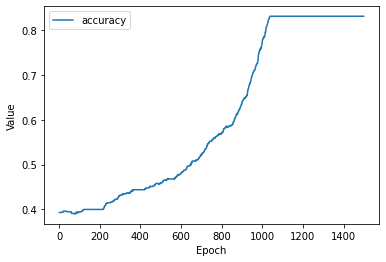

In [13]:
learning_rate = 0.001
epochs = 1500
batch_size = 1000
label_name = "risk_flag"
classification_threshold = 0.35

METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)